In [1]:
import sys
import stmpy
import numpy as np
import cancelv3 as cancel
from decimal import *
import matplotlib.pyplot as plt
from sklearn.externals import joblib
import pandas as pd
import scipy.fftpack as fftp
import os
from scipy import signal
import scipy
import matplotlib.pyplot as plt
import time
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
%pylab inline

C:\Users\jgoet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


### Transfer Function Form

100


C:\Users\jgoet\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in remainder


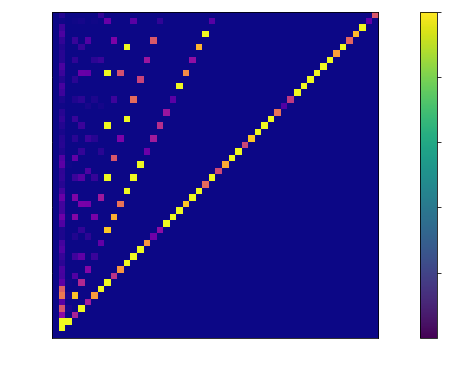

In [2]:
t = linspace(0,1,100)

frq = [2]
amp = [0.1]
wave = np.zeros(len(t))
wave_2 = np.zeros(len(t))
for w,mag in zip(frq,amp):
    wave = wave + np.sin(w*2*np.pi*t)
    wave_2 = wave_2 + mag*np.sin(w*2*np.pi*t)
    
freqs = np.fft.fftfreq(len(wave),1/100)   
print(len(freqs))
waver = linspace(0,len(freqs)/100,len(freqs))
wave_fft = np.fft.fft(wave)/len(wave)*(sin(5*pi*2*waver) + sin(15*pi*2*waver+0.5*pi) + sin(20*pi*2*waver))
wave_2_fft = (np.fft.fft(wave_2)/len(wave))*(sin(5*pi*2*waver) + sin(15*pi*2*waver+0.25*pi) + sin(20*pi*2*waver))  

transf_2d = np.zeros((len(wave_fft),len(wave_fft)),dtype=type(wave_fft[0]))

for i in arange(int(len(wave_fft)/2)):
    i_neg = i+1
    transf_2d[:int(len(wave_fft)/2),i] = wave_2_fft[:int(len(wave_fft)/2)]/wave_fft[i]
    transf_2d[-int(len(wave_fft)/2):,-i_neg] = wave_2_fft[-int(len(wave_fft)/2):]/wave_fft[-i_neg]
#     transf_2d[:int(len(wave_fft)/2),-i_neg] = wave_2_fft[-int(len(wave_fft)/2):]/wave_fft[i]
#     transf_2d[-int(len(wave_fft)/2):,i] = wave_2_fft[:int(len(wave_fft)/2)]/wave_fft[-i_neg]

    array = np.where(arange(int(len(wave_fft)/2))%i != 0)[0]
    array_neg = np.where(((arange(int(len(wave_fft)/2)))+1)%(i+1) != 0)[0]+1
#     array = np.where(arange(int(len(wave_fft)/2)) != int(i*2))[0]
#     array_neg = np.where(arange(int(len(wave_fft)/2)+1) != int(i*2))[0]
        
    transf_2d[array,i]= 0
    transf_2d[-array_neg,-i_neg] = 0
#     transf_2d[array,-i_neg] = 0
#     transf_2d[-array_neg,i] = 0

transf_2d[:,0] = 0 + 0j
transf_2d[0,:] = 0 + 0j

figsize(15,6)
transf_2d_show = absolute(transf_2d[:int(len(wave_fft)/2),:int(len(wave_fft)/2)]).astype('float')
variance = np.diag(sin(5*pi*2*waver) + sin(15*pi*2*waver) + sin(20*pi*2*waver))
# transf_2d_show = transf_2d_show*variance[:50,:50]
transf_2d_show = np.flip(transf_2d_show,axis=0)
# transf_2d_diag = np.copy(np.diag(transf_2d))
# semilogy(absolute(wave_fft[:]))
# semilogy(absolute(wave_2_fft[:]))
# semilogy(absolute(transf_2d_diag[:]))
import scipy.misc

fig,ax = subplots(1,1)
# a colormap and a normalization instance
cmap = plt.cm.plasma
norm = plt.Normalize(vmin=transf_2d_show.min(), vmax=1e-1)

# map the normalized data to colors
# image is now RGBA (512x512x4) 
image = cmap(norm(transf_2d_show))

im = imshow(image,extent=[0,50,0,50])
# cb = stmpy.image.add_cbar()
cb=colorbar(im,)
# h = cb.ax.set_tick_params(color='white')
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='white')
im.axes.set_xticklabels(['0','10','20','30','40','50'],color='white')
im.axes.set_yticklabels(['0','10','20','30','40','50'],color='white')
# label(color='white')
# save the image
# plt.imsave('test.png', image)
# plt.figure()
# plt.imshow(transf_2d_show,cmap=plt.cm.plasma, extent=[0,100,100,0])
# plt.colorbar()
# plt.grid()
# plt.clim(1e-9,1e-1)
# plt.show()
im.axes.tick_params(labelsize=12,color='white')
im.axes.set_xlabel('Geophone (Hz)',size=20,color='white')
im.axes.set_ylabel('Tip Response (Hz)',size=20,color='white')
# plt.title('Matrix Transfer Function',size=20)
savefig('Matrix Transfer Function',transparent=True)

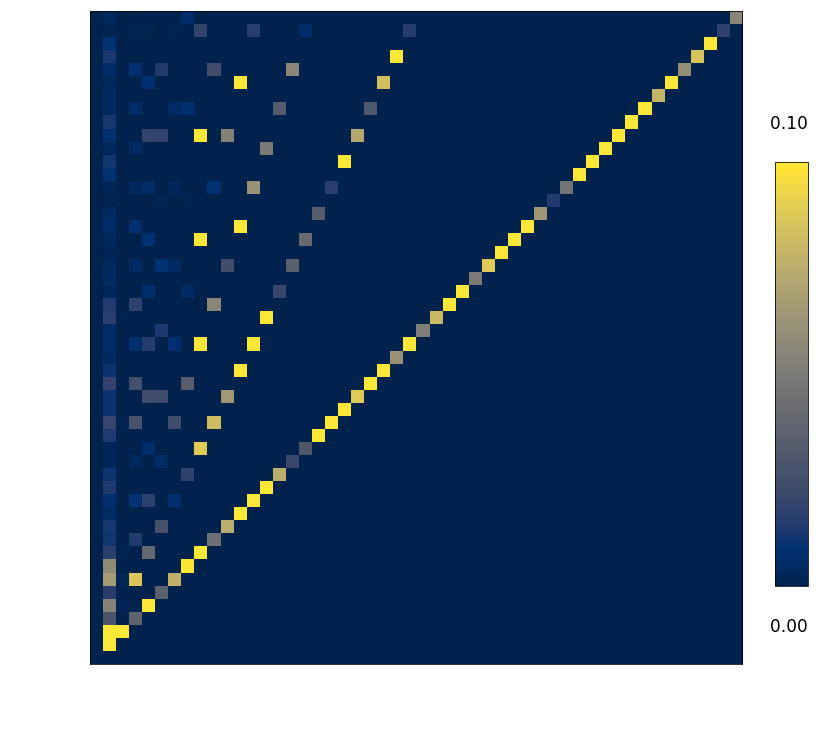

In [51]:
figure(figsize=[15,12])
ax = subplot(111)
im = imshow(transf_2d_show, cmap=stmpy.cm.cividis, aspect=1, clim=(0,0.1),rasterized=True)
cb = stmpy.image.add_cbar(thickness='5%',length='65%',hPos=0.93)
# cb.set_label('colorbar label', color='w')
# plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='r')
im.axes.set_xticklabels(['1','0','10','20','30','40','50'],color='w')
im.axes.set_yticklabels(['0','50','40','30','20','10'],color='w')
im.axes.tick_params(labelsize=28,color='white')
ax.set_xlabel('Geophone (Hz)',size=38,color='white')
ax.set_ylabel('Tip Response (Hz)',size=38,color='white')
savefig('Matrix Transfer Function',transparent= True)

### Transfer Function Creation

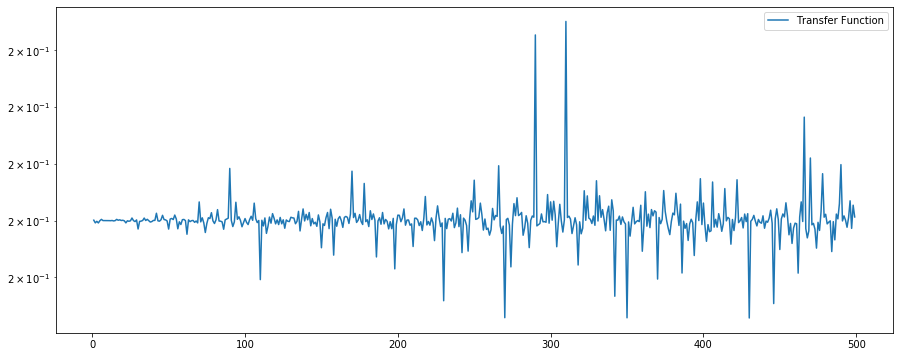

In [1274]:
t = linspace(0,1,1000)

frq = [10]
amp_1 = [0.4]
amp_2 = [0.2]
wave = np.zeros(len(t)) #+ 0.00001*np.random.random(len(t))
wave_2 = np.zeros(len(t))# + 0.0000001*np.random.random(len(t))
for w,mag_1,mag_2 in zip(frq,amp_1,amp_2):
    wave = wave + mag_1*np.sin(w*2*np.pi*t)
    wave_2 = wave_2 + mag_1*mag_2*np.sin(w*2*np.pi*t)
wave = amp_1[0]*np.sin(frq[0]*2*np.pi*t)
wave_2 = amp_2[0]*test_wave #+ amp_2[0]*amp_1[0]*0.5*np.sin(20*2*np.pi*t) + amp_2[0]*amp_1[0]*0.3333*np.sin(30*2*np.pi*t)


freqs = np.fft.fftfreq(len(t),1/1000)   
wave_fft = np.fft.fft(wave)
wave_2_fft = np.fft.fft(wave_2)
transf_1d = wave_2_fft/wave_fft
transf_2d = np.diag(transf_1d)
transf_2d_test = np.copy(transf_2d)

added_freq = [10]
amp_1 = [0.4]
amp_2 = [0.2]

# semilogy(absolute(wave_2_fft[:int(len(wave)/2)]))
for w,mag_1,mag_2 in zip(added_freq,amp_1,amp_2):
    

    for harm in arange(3):
        harm = harm +2 
        amp_harm = 1/harm
        wave_2 = wave_2 + mag_1*amp_harm*mag_2*np.sin(harm*w*2*np.pi*t)

    loc = int(np.where(freqs == w)[0])
    loc = arange(40)+loc -20
    
#     print(loc)
    for i in loc:
        i_neg = i+1
        
        transf_2d[:int(len(wave_fft)/2),i] = absolute(wave_2_fft[:int(len(wave_fft)/2)])/absolute(wave_fft[i])
        transf_2d[-int(len(wave_fft)/2):,-i_neg] = absolute(wave_2_fft[-int(len(wave_fft)/2):])/absolute(wave_fft[-i_neg])
#         print(transf_2d[:int(len(wave_fft)/2),i])
#         array = np.where(arange(int(len(wave_fft)/2))%i != 0)[0]
#         array_neg = np.where(arange(int(len(wave_fft)/2)+1)%(i+1) != 0)[0]
#         aray = np.where(arange(int(len(wave_fft)/2)) < i)[0]
#         aray = np.where(arange(int(len(wave_fft)/2)+1) < i+1)[0]
#         transf_2d[array,i]= 0+0j
#         transf_2d[-array_neg,-i_neg] = 0+0j
        

transf_2d[:,0] = 0 + 0j
transf_2d[0,:] = 0 + 0j

wave_fft = np.fft.fft(wave)
wave_2_fft = np.fft.fft(wave_2)

linear_transf = wave_2_fft/wave_fft
# f = scipy.interpolate.interp1d(w_log,T_flt, kind='linear')

frq = [10]
amp_1 = [0.4]
amp_2 = [0.2]

test_wave = amp_1[0]*np.sin(frq[0]*2*np.pi*t)
test_wave_2 = amp_2[0]*test_wave + amp_2[0]*amp_1[0]*0.5*np.sin(20*2*np.pi*t) + amp_2[0]*amp_1[0]*0.3333*np.sin(30*2*np.pi*t)

# for w,mag_1,mag_2 in zip(frq,amp_1,amp_2):
#     test_wave = test_wave + mag_1*np.sin(w*2*np.pi*t)
#     test_wave_2 = test_wave_2 + mag_1*mag_2*np.sin(w*2*np.pi*t)
#     if w == 10:
#         for harm in arange(3):
#             harm = harm +2 
#             amp_harm = 1/harm
#             test_wave_2 = wave_2 + mag_1*amp_harm*mag_2*np.sin(harm*w*2*np.pi*t)
        
test_fft = np.fft.fft(test_wave)
test_2_fft = np.fft.fft(test_wave_2)
ones = np.ones(len(test_fft),dtype='complex128')

harmonic_approx = np.fft.ifft(0.1*np.dot(transf_2d,test_wave))
test_approx = np.dot(transf_2d_test,ones)
# print(shape(transf_2d*ones),shape(transf_2d),shape(ones))
linear_approx = np.fft.ifft(test_wave*linear_transf)
approx_fft = np.fft.fft(linear_approx)

diff = approx_fft-wave_2_fft
# plot(t,test_wave,label='Geophone (10 Hz)')
# plot(t,test_wave_2,label='Tip (10 Hz + Harmonics)')
# # plot(t,linear_approx)
# plot(t,10*harmonic_approx,label='2D Transfer Function Approximation')
# xlim(0,1)
# harmonic_fft = np.fft.fft(harmonic_approx)
# plot(freqs[:int(len(wave)/2)],absolute(wave_fft[:int(len(wave)/2)]),label='Geophone')
# # plot(freqs[80:121],absolute(wave_fft[80:121]))
# plot(freqs[:int(len(wave)/2)],absolute(wave_2_fft[:int(len(wave)/2)]),label='Tip')
# semilogy(freqs[:int(len(wave)/2)],absolute(harmonic_fft[:int(len(wave)/2)]),label='2D Transfer Function Approximation')
semilogy(freqs[1:int(len(wave)/2)],absolute(test_approx[1:int(len(wave)/2)]),label= 'Transfer Function')
# print(absolute(harmonic_fft[9:12]),absolute(approx_fft[9:12]))
# semilogy(freqs[:int(len(wave)/2)],absolute(approx_fft[:int(len(wave)/2)]))
# ylim(1.9e-3,3.1e2)
# xlim(0.3,200)
legend()
# print(absolute(np.matrix(transf_2d)))
# print(wave_fft)
# print(absolute(np.dot(transf_2d,wave_fft)))

# transf_2d_show = absolute(transf_2d).astype('float')
# plt.imshow(transf_2d_show,cmap=plt.cm.plasma, extent=[0,100,100,0])
# # plt.imshow(transf_2d_diag)
# plt.colorbar()
# # plt.grid()
# plt.clim(1e-10,2e-1)
# plt.show() 

In [1037]:
x = arange(9).reshape((3,3))
y = arange(3)+1

print(np.dot(x,y),shape(x),shape(y))
y = y.reshape(1,3)
print(np.dot(y,x),shape(x),shape(y))

[ 8 26 44] (3, 3) (3,)
[[24 30 36]] (3, 3) (1, 3)
